In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("person_cluster.csv")
df

,Unnamed: 0,customer,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,0,db066f98-5eaa-4655-803d-25d461ff96ab,139,2,182,3,18921,3,8,High-Value
1,1,99ea1aba-d615-4541-b067-bc14b45a23b2,131,2,171,3,15691,3,8,High-Value
2,2,d5b011c9-76b4-48c0-8c9b-ddd48df0df50,134,2,146,3,16907,3,8,High-Value
3,3,79d29e99-f334-4f0b-8b6c-e1730fde5195,239,2,142,3,19298,3,8,High-Value
4,4,808e49fb-3844-4926-acff-10208b9b40e6,181,2,142,3,20960,3,8,High-Value
...,...,...,...,...,...,...,...,...,...,...
182327,182327,63e4814f-3b42-44b0-aee5-56b0ab432801,468,0,1,0,300,0,0,Low-Value
182328,182328,59ae9488-705e-4974-a764-bf1502b47bdd,468,0,1,0,300,0,0,Low-Value
182329,182329,3369bff6-aa95-43a2-8fa7-95abad596cd4,468,0,1,0,300,0,0,Low-Value
182330,182330,0df33f26-bdf2-47d0-9b4c-b93c73b7f517,468,0,1,0,300,0,0,Low-Value


In [7]:
customer_value = df.drop('Unnamed: 0',axis = 1)
customer_value

,customer,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,db066f98-5eaa-4655-803d-25d461ff96ab,139,2,182,3,18921,3,8,High-Value
1,99ea1aba-d615-4541-b067-bc14b45a23b2,131,2,171,3,15691,3,8,High-Value
2,d5b011c9-76b4-48c0-8c9b-ddd48df0df50,134,2,146,3,16907,3,8,High-Value
3,79d29e99-f334-4f0b-8b6c-e1730fde5195,239,2,142,3,19298,3,8,High-Value
4,808e49fb-3844-4926-acff-10208b9b40e6,181,2,142,3,20960,3,8,High-Value
...,...,...,...,...,...,...,...,...,...
182327,63e4814f-3b42-44b0-aee5-56b0ab432801,468,0,1,0,300,0,0,Low-Value
182328,59ae9488-705e-4974-a764-bf1502b47bdd,468,0,1,0,300,0,0,Low-Value
182329,3369bff6-aa95-43a2-8fa7-95abad596cd4,468,0,1,0,300,0,0,Low-Value
182330,0df33f26-bdf2-47d0-9b4c-b93c73b7f517,468,0,1,0,300,0,0,Low-Value


In [8]:
customer_value['OverallScore'].value_counts()

2    38724
3    29299
4    25719
5    19370
1    16845
0    16620
6    12262
7    11536
8     6169
9     5788
Name: OverallScore, dtype: int64

## Label encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
customer_value['Segment'] = labelencoder.fit_transform(customer_value['Segment'])
customer_value.head()

,customer,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,db066f98-5eaa-4655-803d-25d461ff96ab,139,2,182,3,18921,3,8,0
1,99ea1aba-d615-4541-b067-bc14b45a23b2,131,2,171,3,15691,3,8,0
2,d5b011c9-76b4-48c0-8c9b-ddd48df0df50,134,2,146,3,16907,3,8,0
3,79d29e99-f334-4f0b-8b6c-e1730fde5195,239,2,142,3,19298,3,8,0
4,808e49fb-3844-4926-acff-10208b9b40e6,181,2,142,3,20960,3,8,0


In [10]:
labelencoder.classes_

array(['High-Value', 'Low-Value', 'Mid-Value'], dtype=object)

In [11]:
corr_matrix = customer_value.corr()
corr_matrix

,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
Recency,1.000000,-0.965624,-0.254056,-0.242486,-0.277568,-0.268177,-0.639998,-0.084489
RecencyCluster,-0.965624,1.000000,0.238635,0.227285,0.261360,0.251650,0.642517,0.080366
Frequency,-0.254056,0.238635,1.000000,0.951055,0.937704,0.904510,0.861933,-0.282637
FrequencyCluster,-0.242486,0.227285,0.951055,1.000000,0.890005,0.890143,0.871650,-0.207952
Revenue,-0.277568,0.261360,0.937704,0.890005,1.000000,0.936118,0.859056,-0.303857
RevenueCluster,-0.268177,0.251650,0.904510,0.890143,0.936118,1.000000,0.879988,-0.233162
OverallScore,-0.639998,0.642517,0.861933,0.871650,0.859056,0.879988,1.000000,-0.143048
Segment,-0.084489,0.080366,-0.282637,-0.207952,-0.303857,-0.233162,-0.143048,1.000000


##  Standaration

In [12]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
#x = scalar.fit_transform(customer_value[['Recency', 'Frequency', 'Revenue', 'RecencyCluster', 'FrequencyCluster', 'RevenueCluster']])
x = scalar.fit_transform(customer_value[['Recency', 'Frequency', 'Revenue']])
# 結果
y = customer_value['Segment']

In [13]:
x,y

(array([[-0.50008093,  3.24791646,  2.86451432],
        [-0.55343729,  2.97886516,  2.17194141],
        [-0.53342866,  2.36738494,  2.43267474],
        ...,
        [ 1.69419936, -1.17920037, -1.12817926],
        [ 1.69419936, -1.17920037, -1.12817926],
        [ 2.58791838, -1.15474116, -1.1048076 ]]),
 0         0
 1         0
 2         0
 3         0
 4         0
          ..
 182327    1
 182328    1
 182329    1
 182330    1
 182331    1
 Name: Segment, Length: 182332, dtype: int32)

##  Split Test and Train

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=56)

## Support Vector Machine 

'Recency', 'Frequency', 'Revenue'

In [15]:
from sklearn import svm
from sklearn.model_selection import KFold, cross_val_score

clf = svm.SVC(kernel='rbf',C=1,gamma='auto')
clf.fit(X_train, y_train)

clf.predict(X_test)

array([2, 1, 0, ..., 2, 1, 1])

In [16]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

#交叉驗證
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())

0.9656560559857842
0.9651405129105148
[0.96599759 0.96336313 0.96435035 0.96550211 0.96402128]
0.964646893022685


## XGBoost

In [17]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

print(xgbc.score(X_train, y_train))
print(xgbc.score(X_test, y_test))

C:\Users\liou7\anaconda3\envs\maskrcnn\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:17:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.0
0.9999451549919927


## Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=2,criterion='entropy')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7546344031766229
0.7584516157339359


In [20]:
#交叉驗證
scores_dt = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(scores_dt)
print(scores_dt.mean())

[0.75704727 0.75248176 0.75714364 0.75122031 0.75527889]
0.754634376709545


[Text(167.4, 181.2, 'X[2] <= 0.607\nentropy = 1.42\nsamples = 91166\nvalue = [11753, 36069, 43344]'),
 Text(83.7, 108.72, 'X[0] <= -0.643\nentropy = 1.001\nsamples = 71685\nvalue = [6, 36067, 35612]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.005\nsamples = 16747\nvalue = [6, 0, 16741]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.928\nsamples = 54938\nvalue = [0, 36067, 18871]'),
 Text(251.10000000000002, 108.72, 'X[0] <= -0.643\nentropy = 0.971\nsamples = 19481\nvalue = [11747, 2, 7732]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.404\nsamples = 9843\nvalue = [9050, 0, 793]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.858\nsamples = 9638\nvalue = [2697, 2, 6939]')]

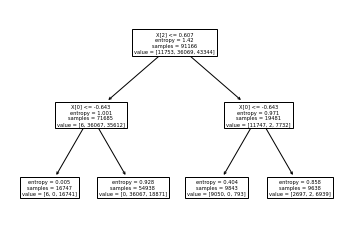

In [21]:
from sklearn.tree import export_graphviz
from sklearn import tree
tree.plot_tree(model)

## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_prd = logreg.predict(X_test)

print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.908266239606871
0.9099225588486936


## Naive Bytes

In [23]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8428251760524758
0.8438014171950069


## K-Nearest Neighbors

In [24]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9967860825307681
0.9931224359958757
